In [23]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
plt.style.use('ggplot')

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout

In [24]:
df = pd.read_csv(r'/Users/suraj/OneDrive/Documents/csProjects/stockPrices/BTC-USD.csv')
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2161,2020-08-17,11895.658203,12359.056641,11806.696289,12254.402344,12254.402344,2.822769e+10
2162,2020-08-18,12251.895508,12335.707031,11954.525391,11991.233398,11991.233398,2.604323e+10
2163,2020-08-19,11990.884766,12028.923828,11687.333008,11758.283203,11758.283203,2.450285e+10
2164,2020-08-20,11761.500000,11900.411133,11710.063477,11878.372070,11878.372070,2.017524e+10
2165,2020-08-21,11879.988281,11898.188477,11793.644531,11837.213867,11837.213867,2.116760e+10


In [25]:
#want to keep date and close prices
df = df.set_index("Date")[['Close']].tail(1000)
df = df.set_index(pd.to_datetime(df.index))

df.head()
print('done')

done


In [26]:
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns =df.columns, index=df.index)
df.head()

,Close
Date,
2017-11-26,0.374757
2017-11-27,0.404756
2017-11-28,0.419543
2017-11-29,0.409077
2017-11-30,0.430293


done


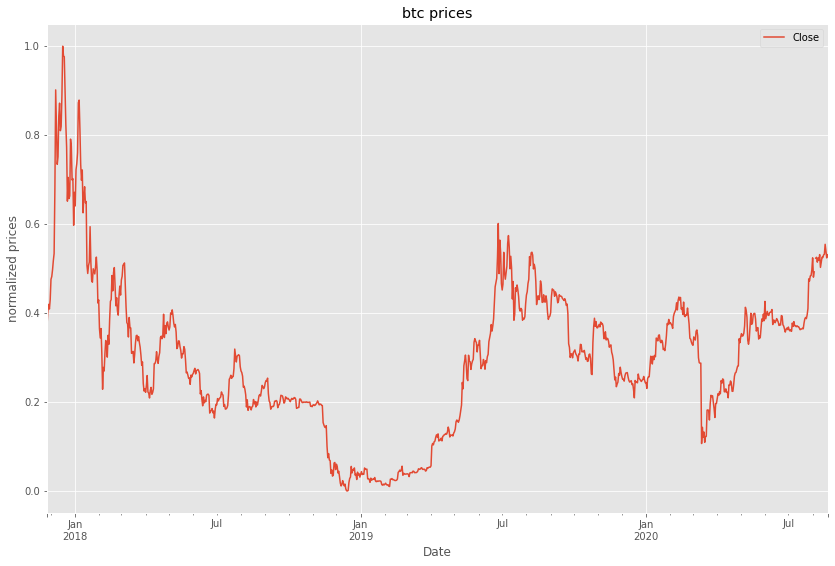

In [14]:
print('done')
df.plot(figsize=(14,9))
plt.title('btc prices')
plt.ylabel('normalized prices')
plt.show()

In [6]:
def split_sequences(seq, n_steps_in, n_steps_out):
    X,y =[], []
    
    for i in range(len(seq)):
        end = i+n_steps_in
        out_end = end+ n_steps_out
        
        if out_end >len(seq):
            break
            
        seq_x, seq_y = seq[i:end], seq[end:out_end]
        
        X.append(seq_x)
        y.append(seq_y)
    
    return np.array(X), np.array(y)

In [7]:
def visualize_results(results):
    history = results.history
    plt.figure(figsize=(12,4))
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss','loss'])
    plt.title('Loss')
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.show()
    
    plt.figure(figsize=(12,4))
    plt.plot(history['val_accuracy'])
    plt.plot(history['accuracy'])
    plt.legend(['val_accuracy','accuracy'])
    plt.title('Accuracy')
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.show()

In [8]:
n_per_in = 30
n_per_out = 10

n_features = 1

X,y = split_sequences(list(df.Close), n_per_in,n_per_out)

print(X.shape)

X = X.reshape(X.shape[0],X.shape[1],n_features)

print(X.shape)
print(y.shape)

(961, 30)
(961, 30, 1)
(961, 10)


In [9]:
model = Sequential()
model.add(LSTM(30, activation='softsign', return_sequences=True, input_shape=(n_per_in,n_features)))
model.add(LSTM(10, activation='softsign', return_sequences=True))
model.add(LSTM(10, activation='softsign', return_sequences=True))
model.add(LSTM(10, activation='softsign', return_sequences=True))
model.add(LSTM(10, activation='softsign', return_sequences=True))
model.add(LSTM(10, activation='softsign'))
model.add(Dense(n_per_out))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 30, 30)            3840      
_________________________________________________________________
lstm_1 (LSTM)                (None, 30, 10)            1640      
_________________________________________________________________
lstm_2 (LSTM)                (None, 30, 10)            840       
_________________________________________________________________
lstm_3 (LSTM)                (None, 30, 10)            840       
_________________________________________________________________
lstm_4 (LSTM)                (None, 30, 10)            840       
_________________________________________________________________
lstm_5 (LSTM)                (None, 10)                840       
_________________________________________________________________
dense (Dense)                (None, 10)                1

In [10]:
model.compile(optimizer='adam',loss='mse', metrics=['accuracy'])

In [11]:
res = model.fit(X,y, epochs=50, batch_size=32, validation_split=0.1)

Epoch 1/50
27/27 [==============================] - 1s 45ms/step - loss: 0.0763 - accuracy: 0.0799 - val_loss: nan - val_accuracy: 0.0722
Epoch 2/50
27/27 [==============================] - 1s 23ms/step - loss: 0.0457 - accuracy: 0.0706 - val_loss: nan - val_accuracy: 0.0619
Epoch 3/50
27/27 [==============================] - 1s 23ms/step - loss: 0.0239 - accuracy: 0.0810 - val_loss: nan - val_accuracy: 0.0515
Epoch 4/50
27/27 [==============================] - 1s 23ms/step - loss: 0.0120 - accuracy: 0.0822 - val_loss: nan - val_accuracy: 0.0619
Epoch 5/50
27/27 [==============================] - 1s 22ms/step - loss: 0.0085 - accuracy: 0.0787 - val_loss: nan - val_accuracy: 0.0619
Epoch 6/50
27/27 [==============================] - 1s 23ms/step - loss: 0.0070 - accuracy: 0.0752 - val_loss: nan - val_accuracy: 0.0722
Epoch 7/50
27/27 [==============================] - 1s 23ms/step - loss: 0.0063 - accuracy: 0.0729 - val_loss: nan - val_accuracy: 0.0515
Epoch 8/50
27/27 [================

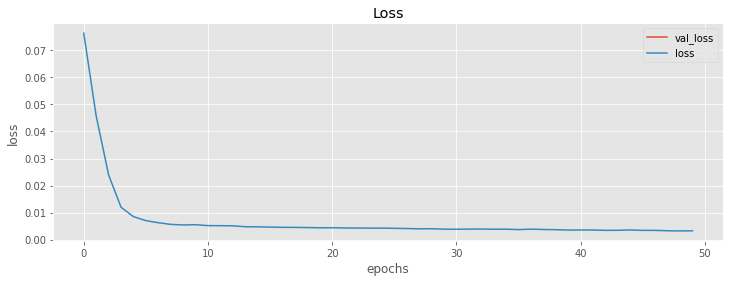

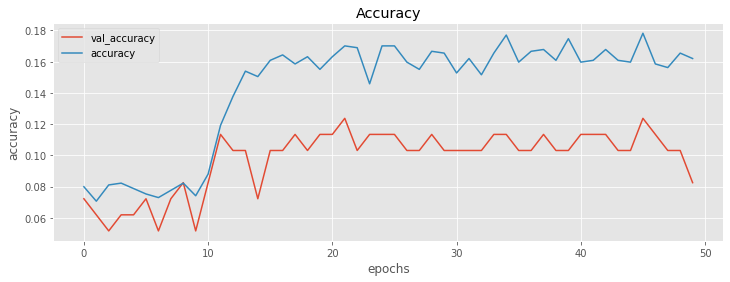

In [15]:
visualize_results(res)

predicted  [[nan], [nan], [nan], [nan], [nan], [nan], [nan], [nan], [nan], [nan]]
actuals  [[11584.93457], [11784.137695], [11768.871094], [11865.698242], [11892.803711], [12254.402344], [11991.233398], [11758.283203], [11878.37207], [11837.213867]]


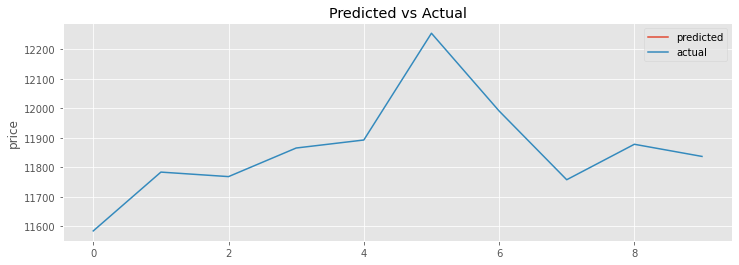

In [18]:
plt.figure(figsize=(12,4))

yhat = model.predict(X[-1].reshape(1,n_per_in,n_features)).tolist()[0]

yhat = scaler.inverse_transform(np.array(yhat).reshape(-1,1)).tolist()

actual = scaler.inverse_transform(y[-1].reshape(-1,1))

print("predicted ", yhat)
plt.plot(yhat, label='predicted')

print("actuals ", actual.tolist())
plt.plot(actual.tolist(), label='actual')

plt.title("Predicted vs Actual")
plt.ylabel('price')
plt.legend()
plt.show()